In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import detrend, resample

### Define Model

In [12]:
# Define the first-order system without delay
def first_order_system(t, K):
    return K * t

### Load the Data

In [13]:
# Load and preprocess the data
experiments = [
    'Data/samsun low light window 7cm/7cm/trial01_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_04_22_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial02_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_08_20_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial03_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_10_11_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial04_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_11_50_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial05_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_13_41_2022_TRACK.xlsx',
]

trials = []
cage = None

# Load the data and resample each trial to match the length of the first trial
for experiment in experiments:
    table = pd.read_excel(experiment)
    fish_data = detrend(table['Fish'])
    if cage is None:
        cage = detrend(table['Cage'])
        t = np.arange(len(cage))
    else:
        # Resample the fish data to match the length of the cage data
        fish_data = resample(fish_data, len(cage))
    trials.append(fish_data)


### Fit the Model to the Data

In [14]:
# Stack trials data for fitting
output = np.hstack(trials)

# Repeat the input 'cage' for each trial
input_repeated = np.tile(cage, len(trials))

# Initial guess for K
initial_guess = [100.0]

# Fit the model
params, covariance = curve_fit(first_order_system, t, output[:len(t)], p0=initial_guess)
K_est = params[0]

print(f"Estimated parameter: K = {K_est}")

Estimated parameter: K = -2.1806556560477475e-10


### Visualize the Results

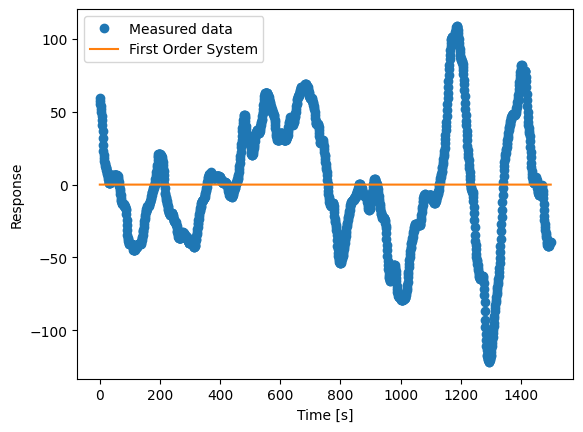

In [15]:
# Plot the results for one of the trials
plt.figure()
plt.plot(t, trials[0], 'o', label='Measured data')
plt.plot(t, first_order_system(t, K_est), '-', label='First Order System')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.legend()
plt.show()